In [1]:
#lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='rainbow')

In [2]:
# Sk Learn

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_csv('heart.csv') #clean data 

In [6]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [7]:
#feature and target data

In [8]:
featured_x = data.drop('target',axis=1)

target_y = data['target']

In [9]:
# Train Test Split

In [10]:
np.random.seed(1)

x_train,x_test,y_train,y_test = train_test_split(featured_x,target_y,test_size=0.2)

clf = KNeighborsClassifier()

#Fitting the model
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [11]:
#Score

In [12]:
clf.score(x_test,y_test)

0.5737704918032787

In [13]:
####################################
#
#
# HYPERPARAMETER TUNNING

In [15]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
train_scores = []
test_scores = []

#creating different values of N-neighbors
neighbors =range(1,21)


knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the algorithm
    knn.fit(x_train,y_train)
    
    #train score
    train_scores.append(knn.score(x_train,y_train))
    
    #test score
    test_scores.append(knn.score(x_test,y_test))

In [18]:
train_scores

[1.0,
 0.8264462809917356,
 0.7933884297520661,
 0.7975206611570248,
 0.7768595041322314,
 0.78099173553719,
 0.756198347107438,
 0.743801652892562,
 0.7231404958677686,
 0.731404958677686,
 0.731404958677686,
 0.7231404958677686,
 0.7148760330578512,
 0.7066115702479339,
 0.7107438016528925,
 0.71900826446281,
 0.6942148760330579,
 0.6983471074380165,
 0.7107438016528925,
 0.7107438016528925]

In [19]:
test_scores

[0.4918032786885246,
 0.4918032786885246,
 0.5737704918032787,
 0.5409836065573771,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5901639344262295,
 0.5901639344262295,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.5737704918032787,
 0.6229508196721312,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6065573770491803,
 0.6229508196721312]

In [20]:
#Best one

Best KNN Score test data: 63.93%


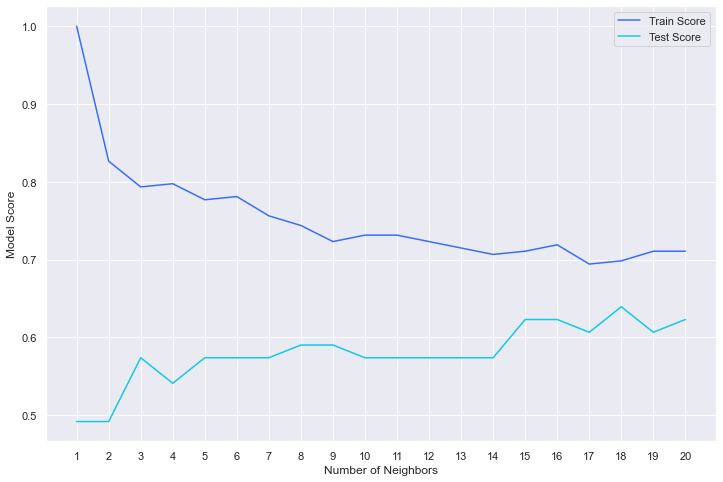

In [24]:
plt.figure(figsize=(12,8))
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')

plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')

plt.legend()

plt.xticks(np.arange(1,21,1))


print(f'Best KNN Score test data: {max(test_scores)*100:.2f}%')
plt.show()